In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    explained_variance_score,
    mean_absolute_percentage_error
)

In [3]:
pwd

'/home/marcos/workdir/phd/Waikato_TAIAO/models'

In [4]:
df = pd.read_parquet("../dataset_temperature_c_interpolation.parquet")
df.head()

,time,Napier_Aerodrome,Wellington_Aerodrome,Enderby_Island,Mokohinau_Island,Cape_Campbell,Westport_Aerodrome,Mahia_NZMHX,Nelson_Aerodrome,Queenstown_Aerodrome,...,Port_Taharoa,Palmerston_N,Gisborne_Aerodrome,Nugget_Point,Dunedin_Aerodrome,Cape_Reinga,Secretary_Island,Kaitaia_Aerodrome,Takapau_Plains,split
0,01-Apr-1993 00:00,15.0,17.0,7.0,17.0,11.0,17.0,14.0,15.0,8.0,...,15.0,14.0,16.0,10.0,8.0,17.0,14.0,16.5,11.4,True
1,01-Apr-1993 01:00,14.0,17.0,7.0,17.0,11.0,16.0,14.0,15.0,8.0,...,14.0,15.0,15.0,10.0,8.0,16.0,14.0,16.5,11.4,True
2,01-Apr-1993 02:00,14.0,17.0,7.0,17.0,11.0,16.0,15.0,15.0,7.0,...,14.0,14.0,15.0,10.0,8.0,16.0,14.0,16.5,11.4,True
3,01-Apr-1993 03:00,13.0,17.0,7.0,17.0,11.0,16.0,15.0,14.0,6.0,...,15.0,14.0,14.0,10.0,8.0,16.0,14.0,16.5,11.4,True
4,01-Apr-1993 04:00,13.0,17.0,7.0,17.0,11.0,15.0,15.0,14.0,7.0,...,15.0,14.0,14.0,10.0,8.0,16.0,14.0,16.5,11.4,True


In [5]:
df.columns

Index(['time', 'Napier_Aerodrome', 'Wellington_Aerodrome', 'Enderby_Island',
       'Mokohinau_Island', 'Cape_Campbell', 'Westport_Aerodrome',
       'Mahia_NZMHX', 'Nelson_Aerodrome', 'Queenstown_Aerodrome',
       'Auckland_Aerodrome', 'Whanganui_Aerodrome', 'Farewell_Spit',
       'Kaikoura_NZKIX', 'Kerikeri_Aerodrome', 'Castlepoint_NZCPX',
       'Haast_NZHTX', 'New_Plymouth', 'Milford_Sound', 'Whangarei_Aerodrome',
       'Christchurch_Aerodrome', 'Tara_Hills', 'Whitianga_Aerodrome',
       'Paraparaumu_Aerodrome', 'Le_Bons', 'Waiouru_Aerodrome', 'Ngawi_NZNWX',
       'Oamaru_Aerodrome', 'Hokitika_Aerodrome', 'Stephens_Island',
       'Tauranga_Aerodrome', 'Raoul_Island', 'Hamilton_Aerodrome', 'Hicks_Bay',
       'Timaru_Airport', 'Taupo_Aerodrome', 'Puysegur_Point', 'Chatham_Island',
       'South_West', 'Hawera_NZHAX', 'Mt_Cook', 'Campbell_Island',
       'Invercargill_NZNVA', 'Port_Taharoa', 'Palmerston_N',
       'Gisborne_Aerodrome', 'Nugget_Point', 'Dunedin_Aerodrome',
     

In [6]:
station = "Napier_Aerodrome"

In [7]:
# train_data = df.query(" split == True ")[station].values
# test_data  = df.query(" split == False ")[station].values
station = "Napier_Aerodrome"
train_data = df.query("split == True")[station].values[-1000:]
test_data  = df.query(" split == False ")[station].values[:500]

train_data.shape, test_data.shape

((1000,), (500,))

In [8]:
%%time
model_auto = pm.auto_arima(train_data, seasonal=True, 
                           m=30, 
                           trace=True)
print(model_auto.summary())

/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=3384.157, Time=4.76 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=5551.247, Time=0.02 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=3583.951, Time=1.44 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=4534.531, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=8658.393, Time=0.01 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[30] intercept   : AIC=3382.451, Time=3.66 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[30] intercept   : AIC=3384.493, Time=0.46 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[30] intercept   : AIC=3383.498, Time=20.59 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[30] intercept   : AIC=3385.204, Time=4.39 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,2)[30] intercept   : AIC=inf, Time=26.35 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,1)[30] intercept   : AIC=3455.988, Time=1.62 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[30] intercept   : AIC=3385.391, Time=2.34 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,1)[30] intercept   : AIC=3388.259, Time=4.39 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,1)[30] intercept   : AIC=3384.324, Time=4.30 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=3485.649, Time=0.82 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,1)[30] intercept   : AIC=3445.009, Time=1.46 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,1)[30] intercept   : AIC=3382.722, Time=2.50 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,1)[30] intercept   : AIC=3383.792, Time=4.84 sec


/home/marcos/.pyenv/versions/3.10.13/envs/gnn-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[30]             : AIC=3516.416, Time=0.67 sec

Best model:  ARIMA(2,0,2)(0,0,1)[30] intercept
Total fit time: 85.419 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 30)   Log Likelihood               -1684.226
Date:                              Mon, 20 Oct 2025   AIC                           3382.451
Time:                                      04:11:49   BIC                           3416.806
Sample:                                           0   HQIC                          3395.508
                                             - 1000                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [9]:
order = model_auto.order
seasonal_order = model_auto.seasonal_order

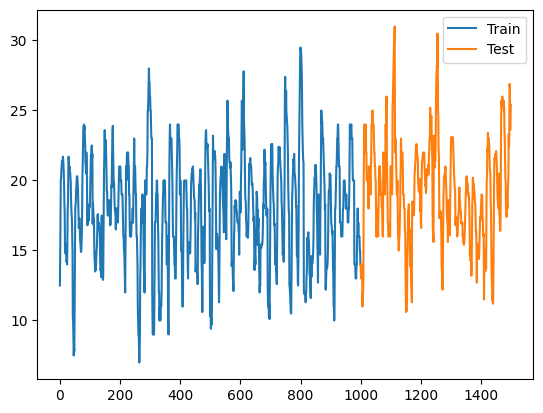

In [10]:
plt.plot(np.arange(0, len(train_data)), train_data, label="Train")
plt.plot(np.arange(len(train_data), len(train_data)+ len(test_data)), test_data, label="Test")
plt.legend()
plt.show()

In [ ]:
model = SARIMAX(train_data,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

In [ ]:
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Corrigir os índices para visualização (já que usamos arrays)
train_idx = np.arange(len(train_data))
test_idx = np.arange(len(train_data), len(train_data) + len(test_data))

plt.figure(figsize=(10, 5))
plt.plot(train_idx, train_data, label='Treino')
plt.plot(test_idx, test_data, label='Teste Real')
plt.plot(test_idx, forecast_mean, label='Previsão SARIMA')

# Faixa de confiança
plt.fill_between(test_idx,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='pink', alpha=0.3)

plt.legend()
plt.title("Previsão SARIMA com dados NumPy")
plt.xlabel("Passos temporais")
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
y_true = test_data
y_pred = forecast_mean

In [ ]:
#  Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

#  Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

#  Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_true, y_pred)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_true, y_pred)

# Explained Variance Score
evs = explained_variance_score(y_true, y_pred)


mape = mean_absolute_percentage_error(y_true, y_pred) 

# Exibindo os resultados
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Median Absolute Error (MedAE): {medae:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

## Batch

In [ ]:
2

In [ ]:
len(trues)

In [ ]:
## create dataframe to save results
plt.figure(figsize=(16, 4))
plt.plot(np.arange(0, 100), test_data[0:100], label="Input Real Data ")
plt.plot(np.arange(100, len(trues)+100), trues, label="Ground Truth")
plt.plot(np.arange(100, len(preds)+100), preds, label="SARIMA Forecasting")
plt.legend()
plt.show()

In [ ]:
from val import regression_metrics
metrics = regression_metrics(trues, preds)
metrics